# Author: [Yunting Chiu](https://www.linkedin.com/in/yuntingchiu/)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

In [2]:
#wd
%cd /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data
!pwd

/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data
/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data


# Exploratory Data Analysis
##Read the data (`.npz` file)

In [ ]:
"""
data_zipped = np.load("np_data_all.npz", allow_pickle=True)

for item in data_zipped.files:
    print(item)
    print(data_zipped[item])
    
print(data_zipped[item].shape)
data = data_zipped[item]
"""

arr_0
[[array([134, 131, 116, ...,  68,  60,  71], dtype=uint8) 'fake']
 [array([133, 130, 115, ...,  71,  59,  71], dtype=uint8) 'fake']
 [array([117, 113, 112, ...,  43,  31,  45], dtype=uint8) 'fake']
 ...
 [array([ 33,  20,  66, ..., 188, 155, 172], dtype=uint8) 'real']
 [array([ 51,  28,  46, ..., 116,  52,  50], dtype=uint8) 'real']
 [array([174, 140, 102, ...,  23,  39,  98], dtype=uint8) 'real']]
(13984, 2)


# Read the data (`.npy` file)

In [13]:
data = np.load("np_data_one.npy", allow_pickle=True)

## Check the length of $X$ and $y$

In [14]:
X = []
y = []
for i in data:
  X.append(i[0])
  y.append(i[1])
print(len(X))
print(len(y))
print("The length should be " + str((6984+7000)))

1998
1998
The length should be 13984


In [15]:
print(X)
print(y)
print("data dimension:",data.shape)

[array([133, 130, 115, ...,  71,  59,  71], dtype=uint8), array([ 49,  40,  25, ..., 111, 105,  73], dtype=uint8), array([28, 21, 15, ..., 49, 44, 40], dtype=uint8), array([ 61,  61,  53, ..., 244, 246, 243], dtype=uint8), array([15, 14, 19, ..., 88, 66, 53], dtype=uint8), array([ 1,  1,  1, ..., 18, 14, 11], dtype=uint8), array([91, 61, 63, ..., 29, 20, 67], dtype=uint8), array([250, 187, 143, ..., 100,  99, 104], dtype=uint8), array([26, 25, 31, ..., 14, 15, 20], dtype=uint8), array([36, 32, 20, ..., 38, 30, 17], dtype=uint8), array([ 51,  37,  34, ..., 179, 158, 131], dtype=uint8), array([163, 146, 164, ..., 109,  55, 104], dtype=uint8), array([ 63,  58,  65, ..., 255, 247, 253], dtype=uint8), array([ 53,  41,  29, ..., 164, 180, 196], dtype=uint8), array([110,  32,  32, ..., 188, 149, 180], dtype=uint8), array([29, 18, 52, ..., 13, 14,  8], dtype=uint8), array([ 78,  59,  65, ..., 194, 207, 239], dtype=uint8), array([101,  77,  73, ...,  34,  32,  46], dtype=uint8), array([ 83,  77

## Visualization

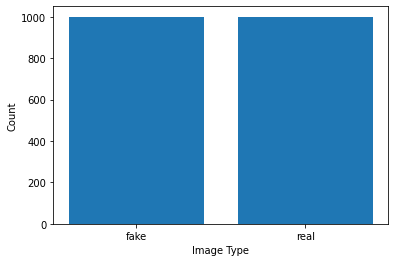

In [6]:
fake_cnt = 0
real_cnt = 0
for i in data:
  if i[1] == "fake":
    fake_cnt += 1
  else:
    real_cnt += 1

#print(fake_cnt)
#print(real_cnt)
df = [['fake', fake_cnt], ['real', real_cnt]]
df = pd.DataFrame(df, columns=['image_type', 'count'])
#ax = df.plot.bar(x='video_type', y='count', rot=0)
#fig = plt.figure()
plt.bar(df['image_type'], df['count'])
plt.xlabel("Image Type")
plt.ylabel("Count")
plt.savefig('count_type.png')

# Machine Learning Task


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler # standardize features by removing the mean and scaling to unit variance.
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Support Vector Machine

In [ ]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # 80% for training, 20 for of testing
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='scale', C = 1)) # clf = classifer
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

print("--- %s seconds ---" % (time.time() - start_time))
print(confusion_matrix(y_test, y_pred))

TypeError: ignored

### SVM Confusion Matrix



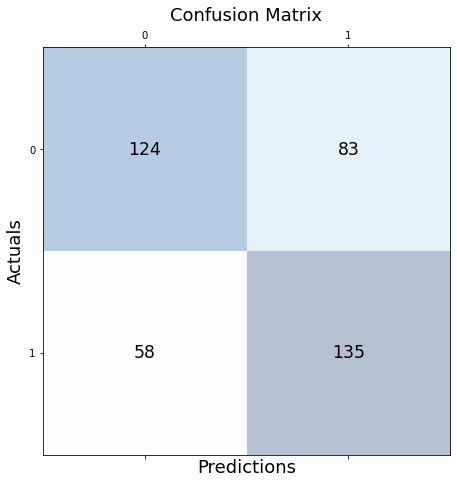

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot_confusion_matrix(svm_clf, X_test, y_test, values_format = '.0f') 
#plt.figure(figsize=(12,8))
#plt.show()
conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
plt.savefig('Confusion_Matrix.png')

### ROC curves
- ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
- Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
- ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

In [ ]:
"""
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
plt.savefig('ROC_AUC_Plot.png')
"""

AttributeError: ignored

### SVM Accuracy Score

In [ ]:
print("----------Accuracy Score----------------")
print(accuracy_score(y_test, y_pred))

target_names = ['fake', 'real']
print(classification_report(y_test, y_pred, target_names=target_names))

----------Accuracy Score----------------
0.6475
              precision    recall  f1-score   support

        fake       0.68      0.60      0.64       207
        real       0.62      0.70      0.66       193

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.65      0.65      0.65       400



## Random Forest Classifier

In [23]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # 80% for training, 20 for of testing
#rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, bootstrap=True)
#rf_clf.fit(X_train, y_train)
#y_pred = rf_clf.predict(X_test)

#print("--- %s seconds ---" % (time.time() - start_time))
#print(confusion_matrix(y_test, y_pred))

### Random Forest Accuracy Score

In [ ]:
print(accuracy_score(y_test, y_pred))

0.7257142857142858


## Logistic Regression

In [ ]:
start_time = time.time()
lg_clf = LogisticRegression(random_state=42, C=1)
lg_clf.fit(X_train, y_train)
y_pred = lg_clf.predict(X_test)

print("--- %s seconds ---" % (time.time() - start_time))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


--- 151.53346586227417 seconds ---
[[251 138]
 [105 206]]


### Logistic Regression Accuracy Score

In [ ]:
print(accuracy_score(y_test, y_pred))

0.6528571428571428


# Nested Cross-Validation (Testing Zone)

In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [24]:
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# create dataset

#X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
#print(X.shape)
#print(y.shape)

# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
# define the model
model = RandomForestClassifier(random_state=42)
# define search space
space = dict()
space['n_estimators'] = [10, 100, 500]
#space['max_features'] = [2, 4, 6]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
scores = cross_val_score(search, X_train, y_train, scoring='accuracy', cv=cv_outer, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


result = search.fit(X_train, y_train)
# get the best performing model fit on the whole training set
best_model = result.best_estimator_
# evaluate model on the hold out dataset
yhat = best_model.predict(X_test)

KeyboardInterrupt: ignored

In [31]:
space = {}
space['n_estimators'] = list(range(1, 1001))
print(space)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

# References
- https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch05.html#idm45022165153592
- https://github.com/scikit-learn/scikit-learn/issues/16127
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
- https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/